<a href="https://colab.research.google.com/github/vkjadon/AI-ipynb/blob/master/25DNNCatNoCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [3]:
% cd drive/MyDrive/Colab Notebooks/AI-ipynb

/content/drive/MyDrive/Colab Notebooks/AI-ipynb


In [7]:
# Loading the data (cat/non-cat) from the File downloaded from the Kaggle
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")

In [8]:
for key in train_dataset.keys():
    print(key) #Names of the groups in HDF5 file.

list_classes
train_set_x
train_set_y


In [9]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y = np.array(train_dataset["train_set_y"][:]) # your train set labels

In [10]:
print(train_set_x_orig.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(209,)


In [11]:
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

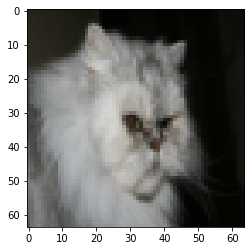

In [12]:
index = 10
plt.imshow(test_set_x_orig[index])

In [13]:
for key in test_dataset.keys():
    print(key) #Names of the groups in HDF5 file.

list_classes
test_set_x
test_set_y


In [14]:
test_dataset["list_classes"]

<HDF5 dataset "list_classes": shape (2,), type "|S7">

In [15]:
classes = np.array(test_dataset["list_classes"][:]) # the list of classes

In [16]:
print(classes)

[b'non-cat' b'cat']


In [17]:
# Explore your dataset 
m_train = train_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
m_test = test_set_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_set_x_orig.shape))
print ("train_y shape: " + str(train_set_y.shape))
print ("test_x_orig shape: " + str(test_set_x_orig.shape))
print ("test_y shape: " + str(test_set_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (209,)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (50,)


In [18]:
# Reshape the training and test examples 
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten=test_set_x_orig.reshape (test_set_x_orig.shape[0],-1)

In [19]:
# Standardize data to have feature values between 0 and 1.
train_x = train_set_x_flatten/255.
test_x = test_set_x_flatten/255.
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (209, 12288)
test_x's shape: (50, 12288)


In [20]:
X=train_x.T
Y=train_set_y.reshape(1,m_train)

- Use random initialization for the weight matrices. Use `np.random.randn(shape) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.


In [21]:
def initialize_parameters(n):
    np.random.seed(1)
    parameters = {}
    L = len(n) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(n[l], n[l-1]) / np.sqrt(n[l-1]) #*0.01
        parameters["b" + str(l)] = np.zeros((n[l], 1))        
        print(l,L)
        assert(parameters['W' + str(l)].shape == (n[l], n[l - 1]))
        assert(parameters['b' + str(l)].shape == (n[l], 1))

    return parameters

In [23]:
# layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
n=np.array([X.shape[0], 20, 7, 5, Y.shape[0]])
print(n)
parameters=initialize_parameters(n)
# print(parameters)
print(parameters["W1"].shape, parameters["W2"].shape, parameters["W3"].shape, parameters["W4"].shape) 

[12288    20     7     5     1]
1 5
2 5
3 5
4 5
(20, 12288) (7, 20) (5, 7) (1, 5)


## Forward Propagation

Layer $l$ takes $a[l-1]$ as input and give $a[l]$ as output. To compute this, we need to compute $z[l]$. The computation $z[l]$ requires $W[l]$ and $b[l]$.   
The vectorized python implementation can be done using:    

$Z[l]=np.dot(W[l],A[l-1])+b[l]$.  

This is also called hidden unit linear output. This is further passed through activation function $g(Z[l])$ to give activation output $A[l]$.    

$A[l]=g(Z[l])$.  

In this example, we will be using RELU as activation function all the layer except the last layer. The sigmoid activation function is the correct choice for logistic regression for the last layer, i.e. $l=L$.  



In [24]:
def forward_propagation(X, parameters):
    A = X
    L = len(parameters)//2 # Double slash operator returns floor of the float output as integer    
    for l in range(1, L):
      A_prev = A
      W=parameters['W' + str(l)]
      b=parameters['b' + str(l)]
      Z=np.dot(W,A_prev)+b
      A= np.maximum(0,Z)
      # print(l,L, A)    
    W=parameters['W' + str(L)]
    b=parameters['b' + str(L)]
    Z=np.dot(W,A)+b
    AL=1/(1+np.exp(-Z))
    return AL,A

In [25]:
AL,A1=forward_propagation(X, parameters)
print(AL.shape)

(1, 209)


In [26]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.dot(Y, np.log(AL).T) + np.dot(1 - Y, np.log(1 - AL).T))
    cost = np.squeeze(cost)
    return cost

In [27]:
cost = compute_cost(AL, Y)

print("Cost: " + str(cost))


Cost: 0.7717493284237686


In [28]:
A = np.array([[1, 2], [3, 4]])
print('axis=1 and keepdims=True')
print(np.sum(A, axis=1, keepdims=True))
print('axis=1 and keepdims=False')
print(np.sum(A, axis=1, keepdims=False))
print('axis=0 and keepdims=True')
print(np.sum(A, axis=0, keepdims=True))
print('axis=0 and keepdims=False')
print(np.sum(A, axis=0, keepdims=False))

axis=1 and keepdims=True
[[3]
 [7]]
axis=1 and keepdims=False
[3 7]
axis=0 and keepdims=True
[[4 6]]
axis=0 and keepdims=False
[4 6]


## Backward Propagation